In [0]:
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report,accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names=['id','clump_thickness','uniform_cell_size','uniform_cell_shape','marginal_adhesion','single_epithelial_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']
df=pd.read_csv(url,names=names)

In [4]:
df.replace('?',-99999,inplace=True)
df.drop(['id'],axis=1,inplace=True)
print(df.axes)
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


In [5]:
df.loc[698]

clump_thickness            4
uniform_cell_size          8
uniform_cell_shape         8
marginal_adhesion          5
single_epithelial_size     4
bare_nuclei                5
bland_chromatin           10
normal_nucleoli            4
mitoses                    1
class                      4
Name: 698, dtype: object

In [6]:
df.describe()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

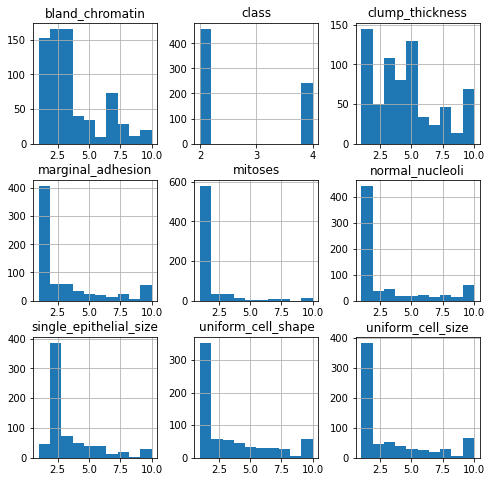

In [7]:
df.hist(figsize=(8,8))
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90cb640550>,
      dtype=object)

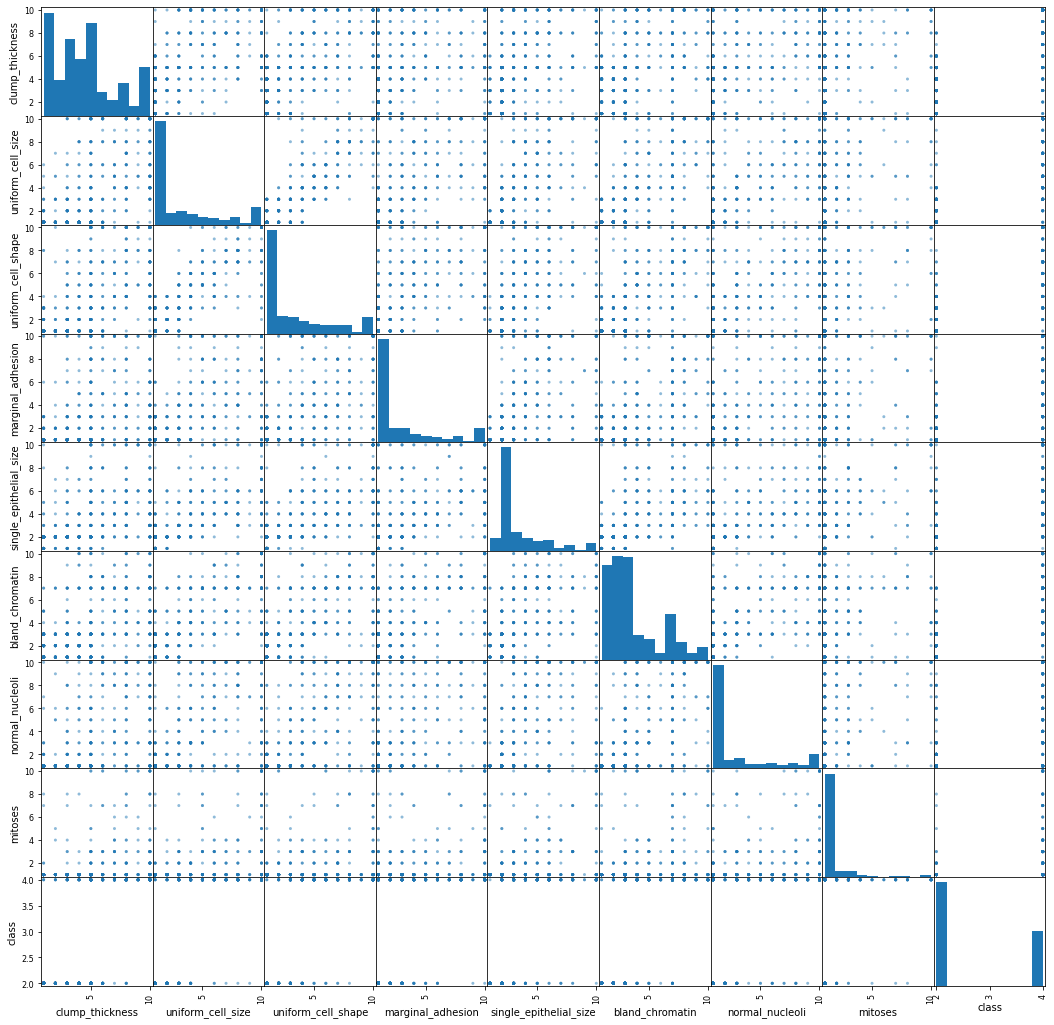

In [8]:
scatter_matrix(df,figsize=(18,18))

In [0]:
#create X and Y
X=np.array(df.drop(['class'],1))
Y=np.array(df['class'])

X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.2)

In [0]:
seed=8
scoring='accuracy'

In [0]:
models=[]
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))

In [17]:
results=[]
names=[]

for name,model in models:
  kfold=model_selection.KFold(n_splits=10,random_state=seed)
  cv_results=model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(name,':',cv_results.mean(),'(',cv_results.std(),')')

KNN : 0.9659415584415585 ( 0.033507830563275456 )
SVM : 0.6512012987012987 ( 0.046433577515963796 )


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [18]:
for name,model in models:
  model.fit(X_train,Y_train)
  predictions=model.predict(X_test)
  print(name)
  print(accuracy_score(Y_test,predictions))
  print(classification_report(Y_test,predictions))

KNN
0.9857142857142858
              precision    recall  f1-score   support

           2       0.99      0.99      0.99        94
           4       0.98      0.98      0.98        46

    accuracy                           0.99       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.99      0.99      0.99       140

SVM
0.6714285714285714
              precision    recall  f1-score   support

           2       0.67      1.00      0.80        94
           4       0.00      0.00      0.00        46

    accuracy                           0.67       140
   macro avg       0.34      0.50      0.40       140
weighted avg       0.45      0.67      0.54       140



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
